In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 13}
matplotlib.rc('font', **font)

In [2]:
import tanh_sinh
import numpy as np

val, error_estimate = tanh_sinh.integrate(
    lambda x: np.exp(x) * np.cos(x),
    0,
    np.pi / 2,
    1.0e-14,
    # Optional: Specify first and second derivative for better error estimation
    # f_derivatives={
    #     1: lambda x: numpy.exp(x) * (numpy.cos(x) - numpy.sin(x)),
    #     2: lambda x: -2 * numpy.exp(x) * numpy.sin(x),
    # },
)

# Testing double integrals

In [3]:
from scipy import integrate

def gg(x,y):
    return 2*x+3*y

zo = 9.85e-08
xo = 1.92e-07
dz = 1e-09
dx = 2e-09
gg(zo,xo)*dz*dx

1.5460000000000002e-24

In [4]:
# Not sure why this is inaccurate....

integrate.dblquad(gg, zo-dz/2, zo+dz/2, xo-dx/2 , xo+dx/2)

(1.3589999999999883e-24, 1.512109294986654e-29)

In [5]:
integrate.nquad(gg,[[zo-dz/2, zo+dz/2],[xo-dx/2 , xo+dx/2]])

(1.5459999999999868e-24, 8.615186025563148e-30)

# Apply integrals on psi_s and psi_x

In [6]:
from csr2d.core2 import psi_s, psi_x, psi_x0, Es_case_B

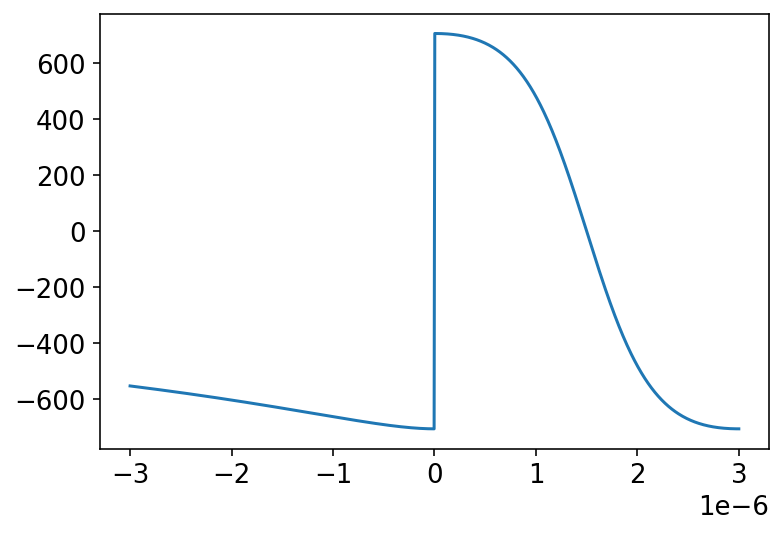

In [115]:
x_vec = np.linspace(-1,1,900)*3e-6

fff = lambda x : psi_s(z_o, x, beta)
plt.plot(x_vec, fff(x_vec))

In [7]:
dx = 1e-8
dz = 1e-8
nx = 105
nz = 103
rho = 5
beta = 0.999999

dx = dx/rho
dz = dz/(2*abs(rho))
    
# Double-sized array for convolution with the density
zvec2 = np.arange(-nz+1,nz+1,1)*dz # center = 0 is at [nz-1]
xvec2 = np.arange(-nx+1,nx+1,1)*dx # center = 0 is at [nx-1]
    
zm2, xm2 = np.meshgrid(zvec2, xvec2, indexing="ij")
    
# Evaluate
#psi_s_grid, psi_x_grid = psi_sx(zm2, xm2, beta)
psi_s_grid = psi_s(zm2, xm2, beta) # Numba routines!

Text(0.5, 0.92, 'psi_s at the first step of chicane')

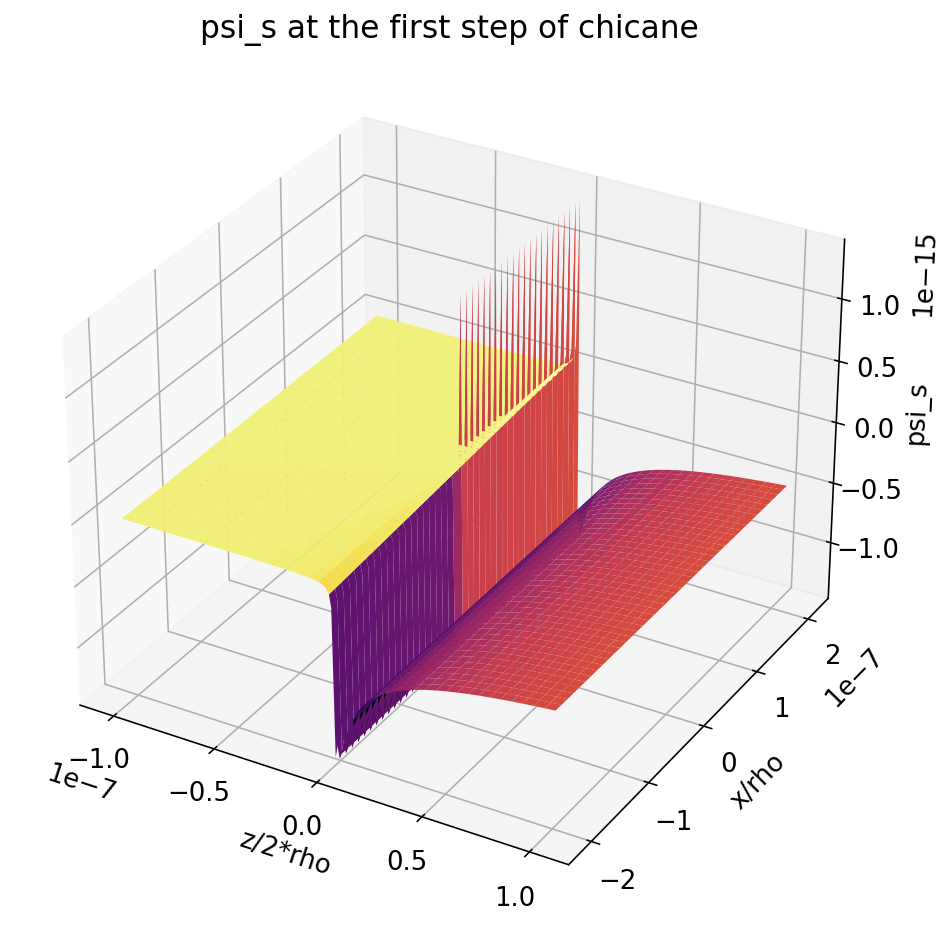

In [119]:
from mpl_toolkits import mplot3d
Z, X = np.meshgrid(zvec2,xvec2, indexing="ij")

fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
#ax.contour3D(Z,X, psi_s_grid , 1000, cmap='inferno')
ax.plot_surface(Z,X, psi_s_grid *dx*dz, cmap='inferno')
ax.set_xlabel('z/2*rho')
ax.set_ylabel('x/rho')
ax.set_zlabel('psi_s')
ax.set_title('psi_s at the first step of chicane')

In [8]:
psi_s(zvec2[200],xvec2[200],beta)*dz*dx

-4.76438124289866e-16

In [12]:
def IGF2(func, zval, xval, dz, dx):
    return integrate.nquad(func, [[zval-dz/2, zval+dz/2], [xval-dx/2, xval+dx/2]])[0]

In [20]:
psi_s_zx = lambda z, x: psi_s(z,x,beta)
psi_x_zx = lambda z, x: psi_x(z,x,beta)
IGF2(psi_s_zx , zvec2[200], xvec2[200], dz, dx)

-4.764390320629117e-16

In [23]:
IGF2_zx = lambda z, x: IGF2(psi_s_zx, z, x, dz, dx)

In [24]:
IGF2_zx(zvec2[200], xvec2[200])

-4.764390320629117e-16

In [15]:
IGF2(psi_x_zx, 1e-10, 1e-10, 1e-9*2, 1e-9*2)

-7.594152246157939e-15

In [146]:
IGF2(psi_x_zx, dz ,dx, dz, dx)

-1.0996648181043446e-18

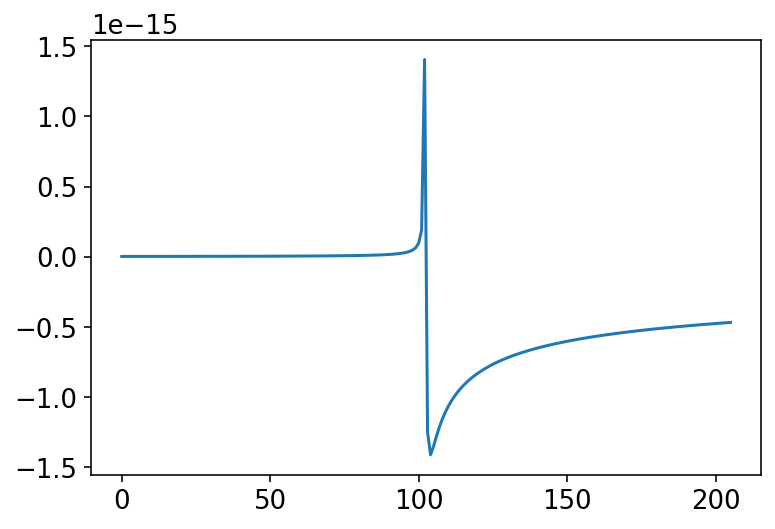

In [25]:
kaka = psi_s(zm2[:,200], xm2[:,200],beta)*dz*dx
plt.plot(kaka)

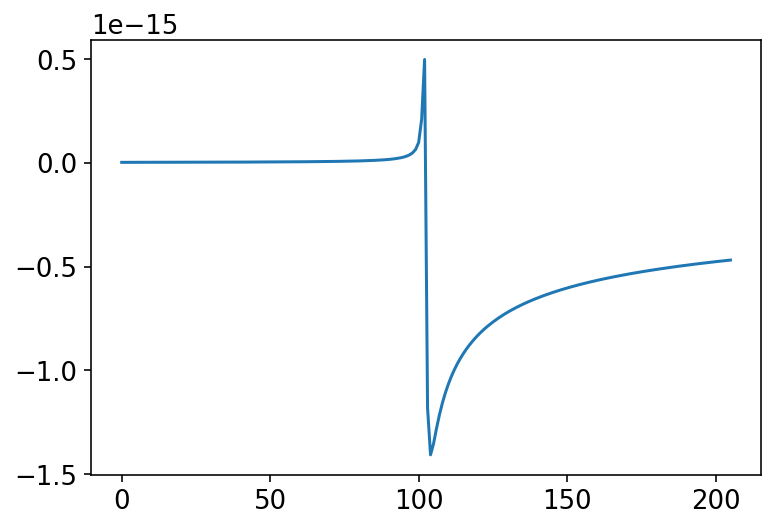

In [26]:
kaka = np.array(list(map( IGF2_zx, zm2[:,200], xm2[:,200])))
plt.plot(kaka)

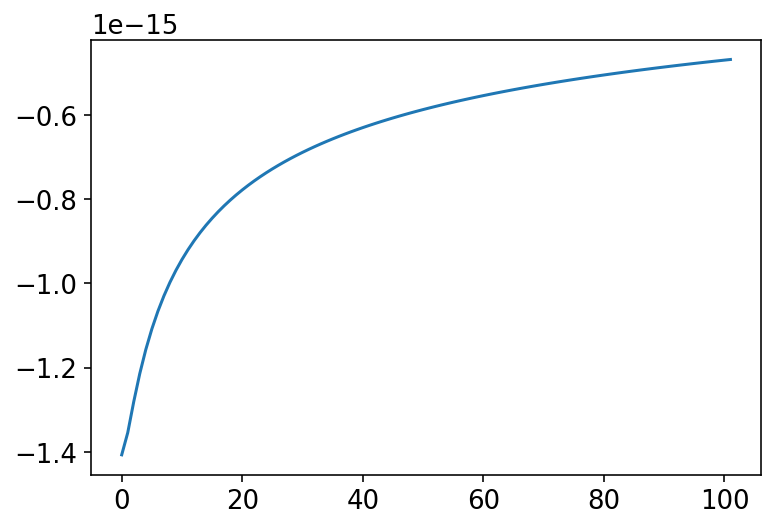

In [88]:
kaka = np.array(list(map( IGF2_zx, zm2[:,200][104:], xm2[:,200][104:])))
plt.plot(kaka)

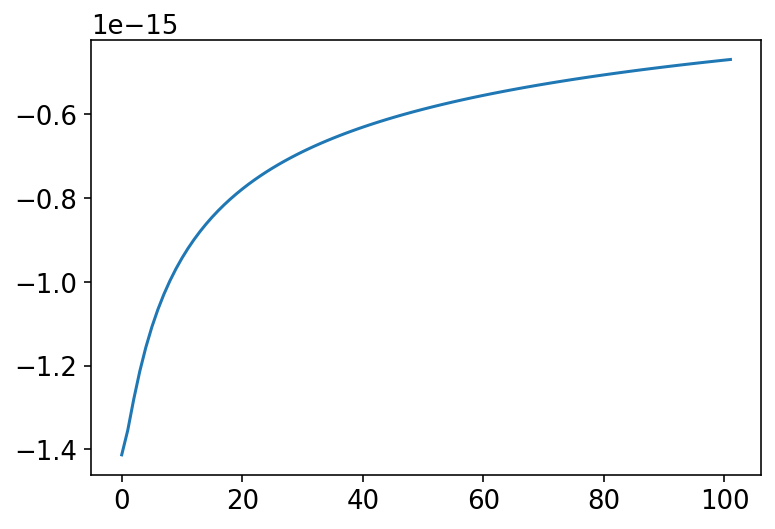

In [72]:
ref = psi_s(zm2[:,200][104:], xm2[:,200][104:],beta)*dz*dx
plt.plot(ref)

In [207]:
listmap(psi_s,zm2,xm2)

In [ ]:
executor.map( IGF2_zx, zm2.flatten(), xm2.flatten())

In [27]:
import concurrent.futures as cf
with cf.ProcessPoolExecutor(max_workers=20) as executor:
    kaka = np.array(list(executor.map( IGF2_zx, zm2.flatten(), xm2.flatten())))
    jaja = kaka.reshape(zm2.shape)

Process ForkProcess-9:
Process ForkProcess-11:
Process ForkProcess-20:
Process ForkProcess-14:
Process ForkProcess-19:
Process ForkProcess-1:
Process ForkProcess-17:
Process ForkProcess-16:
Process ForkProcess-5:
Process ForkProcess-18:
Process ForkProcess-8:
Process ForkProcess-13:
Process ForkProcess-12:
Process ForkProcess-15:
Process ForkProcess-10:
Process ForkProcess-7:
Process ForkProcess-6:
Process ForkProcess-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most

KeyboardInterrupt: 

  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/global/homes/w/wlou1991/.conda/envs/cupy/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/global/homes/w/wl

In [ ]:
## SLOW!!
kaka = np.array(list(map( IGF2_zx, zm2.flatten(), xm2.flatten())))
jaja = kaka.reshape(zm2.shape)

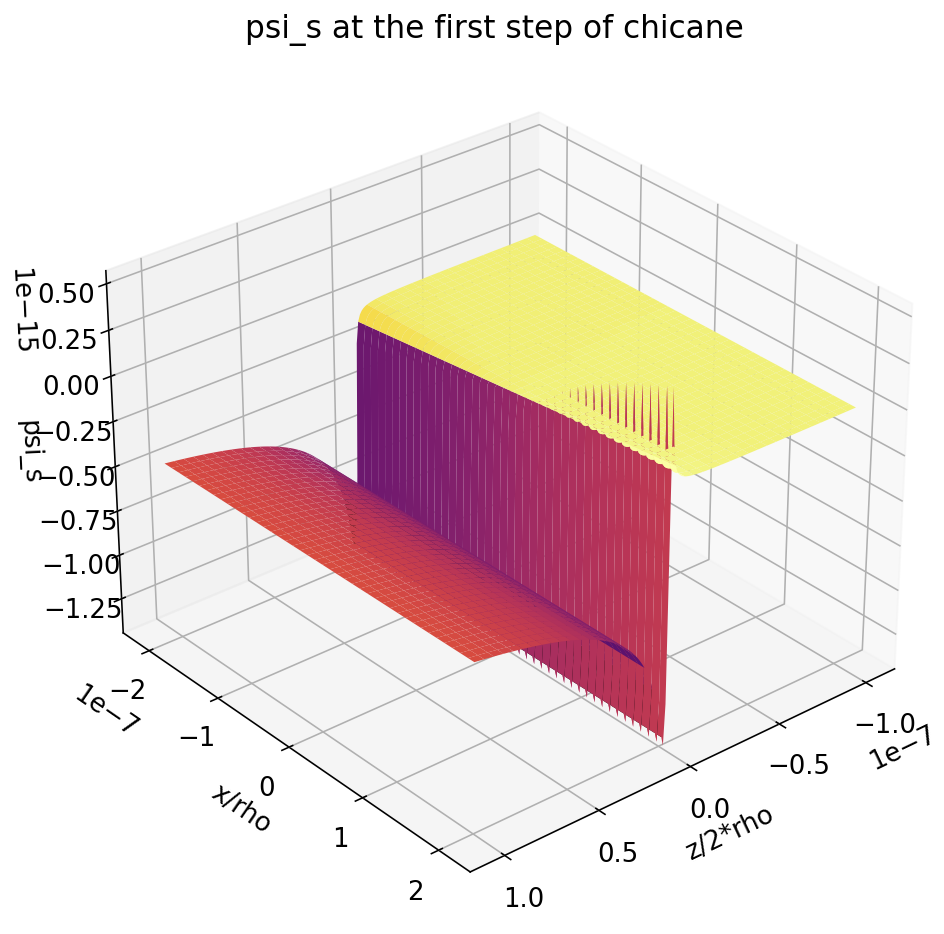

In [99]:
Z, X = np.meshgrid(zvec2,xvec2, indexing="ij")

fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
#ax.contour3D(Z,X, psi_s_grid , 1000, cmap='inferno')
ax.plot_surface(Z,X, jaja, cmap='inferno')
ax.set_xlabel('z/2*rho')
ax.set_ylabel('x/rho')
ax.set_zlabel('psi_s')
ax.set_title('psi_s at the first step of chicane')

ax.azim = 50

In [95]:
zm2.shape

(206, 210)

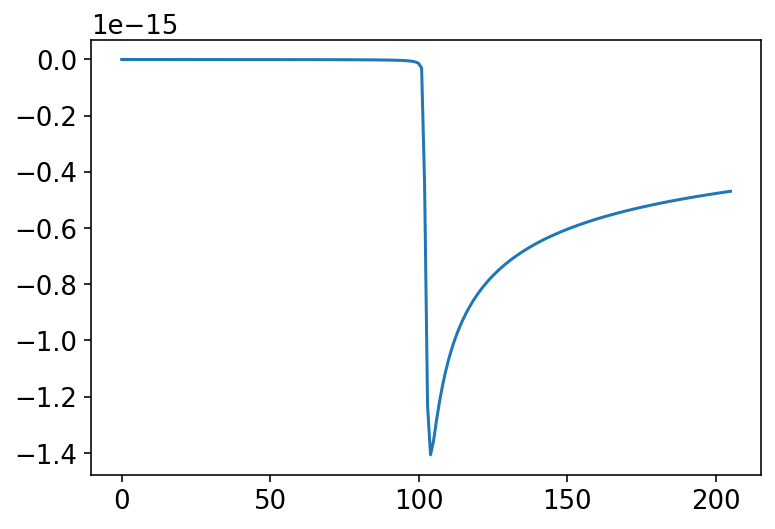

In [103]:
plt.plot(jaja[:, 90])

# Trying fast integration with numba

In [201]:
import numpy as np
from scipy import integrate
from scipy.special import erf
from scipy.special import j0
import time
import numba as nb
from numba import cfunc
from numba.types import intc, CPointer, float64
from scipy import LowLevelCallable

q = np.linspace(0.03, 1.0, 1000)

start = time.time()

def jit_integrand_function(integrand_function):
    jitted_function = nb.njit(integrand_function)

    #error_model="numpy" -> Don't check for division by zero
    @cfunc(float64(intc, CPointer(float64)),error_model="numpy",fastmath=True)
    def wrapped(n, xx):
        ar = nb.carray(xx, n)
        return jitted_function(ar[0], ar[1])
    return LowLevelCallable(wrapped.ctypes)

@jit_integrand_function
def f(z, x):
    #return gg(z,x)
    return 2*z+3*x

y = np.empty(len(zvec2))
for n in range(len(zvec2)):
    y[n] = integrate.nquad(f, [[zvec2[n]-dz/2, zvec2[n]+dz/2], [1.91e-07,  1.93e-07]])[0]
   # y[n] = integrate.dblquad(f, [0, 50], 1.91e-07, upper_inner)[0]

end = time.time()
print(end - start)

0.09854769706726074


In [191]:
zvec2

array([-1.02e-07, -1.01e-07, -1.00e-07, -9.90e-08, -9.80e-08, -9.70e-08,
       -9.60e-08, -9.50e-08, -9.40e-08, -9.30e-08, -9.20e-08, -9.10e-08,
       -9.00e-08, -8.90e-08, -8.80e-08, -8.70e-08, -8.60e-08, -8.50e-08,
       -8.40e-08, -8.30e-08, -8.20e-08, -8.10e-08, -8.00e-08, -7.90e-08,
       -7.80e-08, -7.70e-08, -7.60e-08, -7.50e-08, -7.40e-08, -7.30e-08,
       -7.20e-08, -7.10e-08, -7.00e-08, -6.90e-08, -6.80e-08, -6.70e-08,
       -6.60e-08, -6.50e-08, -6.40e-08, -6.30e-08, -6.20e-08, -6.10e-08,
       -6.00e-08, -5.90e-08, -5.80e-08, -5.70e-08, -5.60e-08, -5.50e-08,
       -5.40e-08, -5.30e-08, -5.20e-08, -5.10e-08, -5.00e-08, -4.90e-08,
       -4.80e-08, -4.70e-08, -4.60e-08, -4.50e-08, -4.40e-08, -4.30e-08,
       -4.20e-08, -4.10e-08, -4.00e-08, -3.90e-08, -3.80e-08, -3.70e-08,
       -3.60e-08, -3.50e-08, -3.40e-08, -3.30e-08, -3.20e-08, -3.10e-08,
       -3.00e-08, -2.90e-08, -2.80e-08, -2.70e-08, -2.60e-08, -2.50e-08,
       -2.40e-08, -2.30e-08, -2.20e-08, -2.10e-08, 

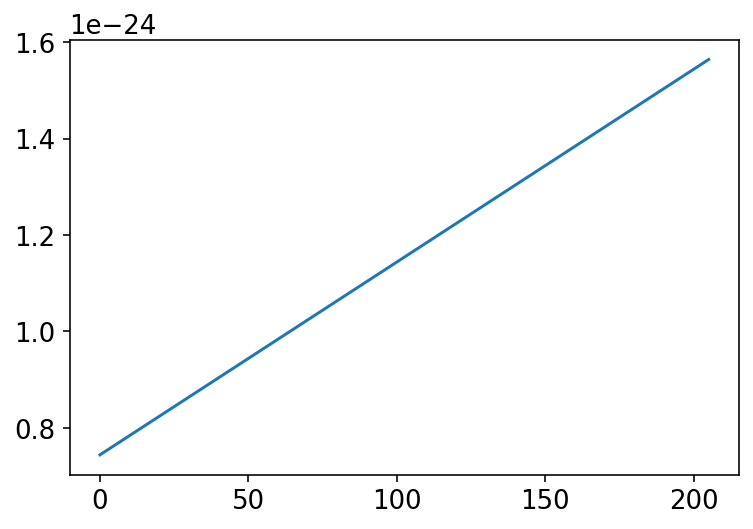

In [190]:
plt.plot(y)

In [167]:
from scipy import integrate

def gg(x,y):
    return 2*x+3*y

zo = 9.85e-08
xo = 1.92e-07
dz = 1e-09
dx = 2e-09
gg(zo,xo)*dz*dx

8

In [ ]:
def IGF2(func, zval, xval, dz, dx):
    return integrate.nquad(func, [[zval-dz/2, zval+dz/2], [xval-dx/2, xval+dx/2]])[0]

In [181]:
xo+dx/2

1.93e-07

In [ ]:
integrate.nquad(gg,[[zo-dz/2, zo+dz/2],[xo-dx/2 , xo+dx/2]])

In [198]:
from csr2d.core2 import alpha
from numba import vectorize, float64, njit

from numpy import abs, sin, cos, real, exp, pi, cbrt, sqrt

@vectorize([float64(float64, float64, float64)], target='parallel')
def psi_s2(z, x, beta):
    """
    2D longitudinal potential
    
    Numba vectorized
    
    Eq. (23) from Ref[1] with no constant factor (e*beta**2/2/rho**2).
    Ref[1]: Y. Cai and Yuantao. Ding, PRAB 23, 014402 (2020).
    Note that 'x' here corresponds to 'chi = x / rho' in the paper.
    """
    
    if z == 0 and x == 0:
        return 0
    
    beta2 = beta**2
    
    alp = alpha(z, x, beta2)
    kap = sqrt(x**2 + 4*(1+x) * sin(alp)**2)
    
    out = (cos(2*alp)- 1/(1+x)) / (
            kap - beta * (1+x) * sin(2*alp))   

    return out

TypeError: The decorated object is not a function (got type <class 'numpy.ufunc'>).

In [2]:
from scipy.integrate import nquad
from math import sqrt, exp, sin, cos

from scipy import LowLevelCallable

from numba import cfunc, types, carray

c_sig = types.double(types.intc, types.CPointer(types.double))
@cfunc(c_sig)
def f(n, data):
    total = 0.0
    for i in range(n):
        total += exp(data[i])**2
    return sin(cos(sqrt(total)))

In [4]:
ranges=((1, 2), (1, 2), (1, 2))
new_f = LowLevelCallable(f.ctypes)
print(nquad(new_f, ranges))

%timeit 

(-0.14048187566074577, 1.4506979457578973e-08)
6.89 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
nquad(new_f, ranges)

7.03 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
def f(x, y, z):
    return sin(cos(sqrt(exp(x)**2 + exp(y)**2 + exp(z)**2)))

In [8]:
%%timeit
nquad(f, ranges)

19 ms ± 680 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
